# The Impact of Regularization

<p>The following notebook will highlight the impact of using Ridge Regularization. The required imports are shown in the following cell. The random seed has been set to 42 for reproducibility. Some stylistic settings have been activated to improve the presentation of the graphs.</p>

In [18]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
sns.set_context('paper')
plt.style.use('seaborn')
%matplotlib inline
np.random.seed(42)

<p>The first step is to generate two sets of data. The premise of this exercise is to mimic a real-world situation where the relationship between input and output is affected by noise. To do this, we will add Gaussian noise to a sample of 10 data points from the function y = sin(2πx). To visualize the effect of the noise on the data points, we also generate 100 data points for the continuous function y = sin(2πx)</p>

In [19]:
#Generate datapoints for y = sin (2πx) + noise
x = np.random.random_sample(10)
y_orig = np.sin(2*math.pi*x) 
noise = np.random.normal(0,0.3,10)
y_noise = np.sin(2*math.pi*x) + noise

#Generate Curve for y = sin (2πx)
x2 = np.linspace(0,1,100)
y2 = np.sin(2*math.pi*x2)

<p>Below is the visualization of the original function (orange) along with the noisy datapoints (blue). A low number of data points was selected to clearly demonstrate how fitting regression models with low amounts of data leads to the manifestation of over and under fitting</p>

Text(0.5, 1.0, 'y = sin (2πx) vs. y = sin (2πx) + noise ')

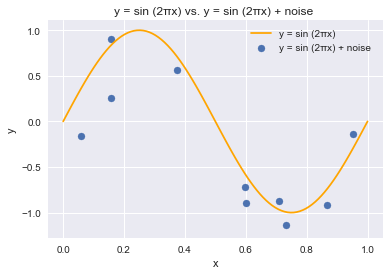

In [20]:
plt.plot(x2,y2, label = 'y = sin (2πx)', color='orange')
plt.scatter(x, y_noise, label = 'y = sin (2πx) + noise ')
plt.legend()
plt.xlabel("x")
plt.ylabel('y')
plt.title('y = sin (2πx) vs. y = sin (2πx) + noise ')

<p>For our first model, we will be using linear regression with polynomial features, effectively making a polynomial regression model. The first stage in creating this model is to create the polynomial features. As each data point currently contains an x and y value, the 9 more features are generated by raising the x value to the power of 2, 3, ... 10.<p>

In [21]:
#generate polynomial features up to degree 10
data = pd.DataFrame(x, columns = ['x'])   ## These data points will be using to train the model
for i in range(2,11):  
    colname = 'x_%d'%i      
    data[colname] = data['x']**i

Test_Data = np.linspace(np.sort(x)[0], np.sort(x)[-1], num =50)   # 50 data points that will be used to demonstrate the relationship built by the model (extreme case) 
Test_Data = pd.DataFrame(Test_Data, columns = ['x'])
for i in range(2,11): 
    colname = 'x_%d'%i 
    Test_Data[colname] = Test_Data['x']**i

<p>The following code creates 10 subplots, one for each of the polynomial degrees. For each degree, only the associated polynomial terms are used to build the linear regression model (ex. a polynomial degree of 4 uses 4 terms: x1, x2, x3, x4). As seen in these figures, the first two degrees show underfitting whereas degrees 7+ show clear signs of overfitting.</p>

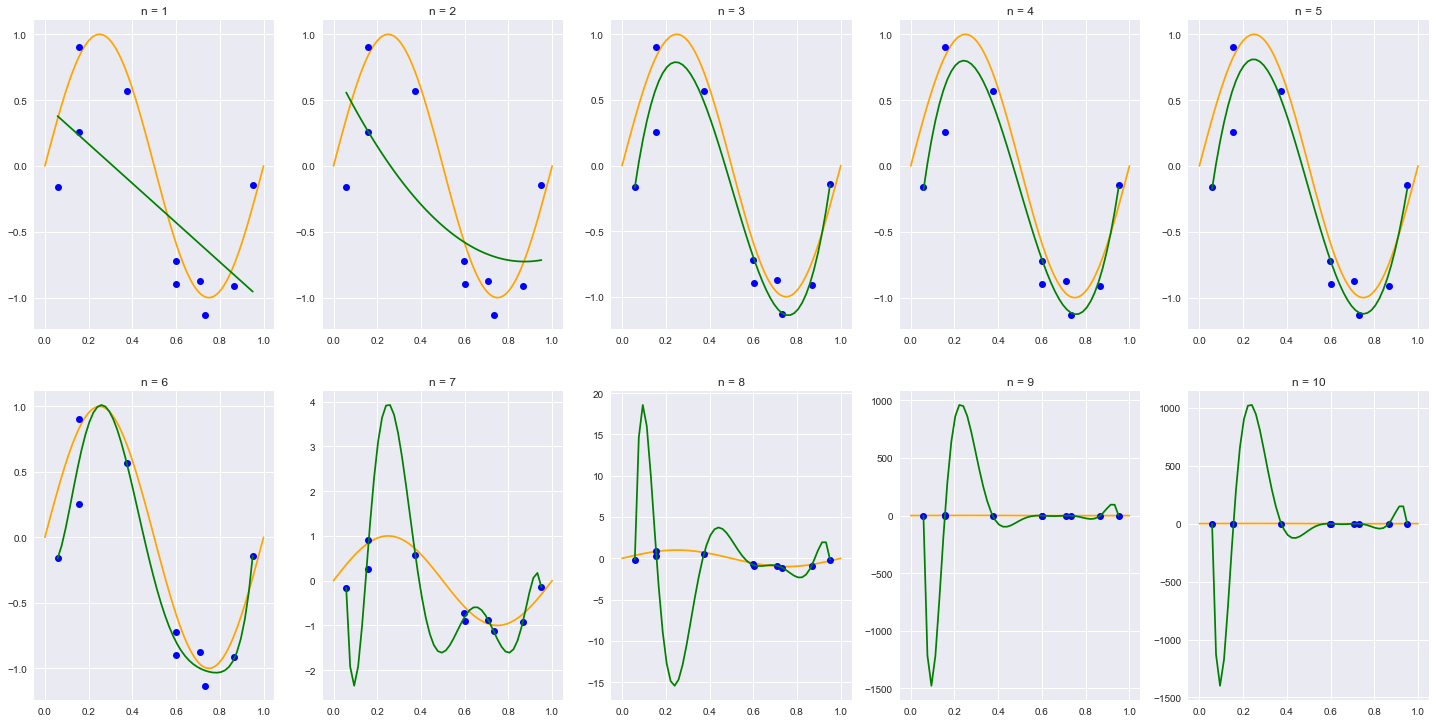

In [22]:
coefs = []  ## Python list
rss = []
fig, axs = plt.subplots(2,5, figsize = (25,12.5))
for i in range(0,2):
    for j in range (0,5):
        LeastSquaresModel = LinearRegression(normalize=True)
        LeastSquaresModel.fit(data.iloc[:,0:5*i+j+1], y_noise)
        Test_Data_pred_curve = LeastSquaresModel.predict(Test_Data.iloc[:,0:5*i+j+1]) ## we applied the model to the 50 data  points
        y_pred_points = LeastSquaresModel.predict(data.iloc[:,0:5*i+j+1])  ## prediciting of the training data points
        rss.append(np.sum(np.square(y_noise - y_pred_points))) ## Training RSS
        coefs.append(LeastSquaresModel.coef_)  ## Model Coefficients
        axs[i,j].plot(x2,y2, label = 'y = sin (2πx)', color='orange') ## the sin function
        axs[i,j].plot(x, y_noise,"o", color='b') # the 10 training points (with noise)
        axs[i,j].plot(Test_Data.x, Test_Data_pred_curve, color='g')  ## visulization of the model
        axs[i,j].title.set_text("n = " + str(5*i+j+1))
        

<p>As seen above, as the model complexity increases, so too does the level of overfitting. To further illustrate a consequence of the higher-order polynomials, we will explore the coefficients of each model. </p>

In [23]:
#Visualizing Size of Coefficients
coef_mat = pd.DataFrame(coefs)  ## coefficent matrix
pd.options.display.float_format = '{:,.2g}'.format
coef_mat.index.name = 'polynomial rank'
coef_mat.columns = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']
coef_mat

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
polynomial rank,,,,,,,,,,
0,-1.5,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,-3.4,1.9,nan,nan,nan,nan,nan,nan,nan,nan
2,16,-43,28,nan,nan,nan,nan,nan,nan,nan
3,17,-47,35,-3.6,nan,nan,nan,nan,nan,nan
4,15,-34,0.31,36,-16,nan,nan,nan,nan,nan
5,-13,2.1e+02,-9.4e+02,1.7e+03,-1.5e+03,4.9e+02,nan,nan,nan,nan
6,-7.1e+02,7.4e+03,-3.4e+04,8.1e+04,-1e+05,6.9e+04,-1.8e+04,nan,nan,nan
7,6.6e+03,-7.4e+04,4e+05,-1.2e+06,2e+06,-2e+06,1.1e+06,-2.6e+05,nan,nan
8,-6.5e+05,8e+06,-4.8e+07,1.7e+08,-3.7e+08,4.9e+08,-4.1e+08,1.9e+08,-3.8e+07,nan


<p>What we have observed above is known as coefficient explosion (magnitude of coefficients increases exponentially as model complexity increases) and is a key indication of overfitting. To further verify this, we will plot the Residual Sum of Squares (RSS) for each of the polynomial degrees. As seen in this plot, the highest rank polynomials have an RSS of 0 as they fit each point.</p>

Text(0.5, 1.0, 'The effect of Polynomial Rank on RSS')

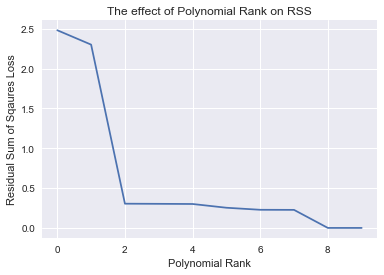

In [24]:
plt.plot(rss)
plt.xlabel('Polynomial Rank')
plt.ylabel('Residual Sum of Sqaures Loss')
plt.title("The effect of Polynomial Rank on RSS")

<p>To illustrate coefficient explosion, we plot the mean absolute magnitude of the coefficients for each of the polynomial ranks. As seen, the average magnitude of the coefficient drastically increases with model complexity.</p>

Text(0.5, 1.0, 'The effect of model complexity on the mean absolute magnitude of coefficients')

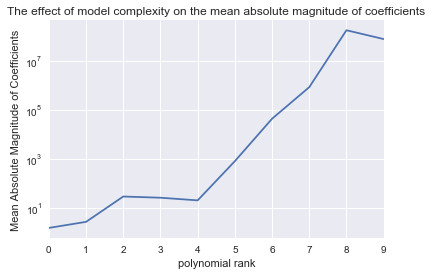

In [25]:
abs(coef_mat).mean(axis=1).plot(logy=True)
plt.ylabel("Mean Absolute Magnitude of Coefficients")
plt.title("The effect of model complexity on the mean absolute magnitude of coefficients")

<p> To mitigate the effect of overfitting with respect to polynomial rank, Ridge Regression is used. As you know, in terms of Ridge Regression, the α parameter defines the level of regularization; an α of 0 indicates no regularization whereas an α approaching $ \infty $ indicates full regularization and reduces all coefficients to 0. The following code illustrates the effect of this regularization on the 10 term polynomial developed above.  </p>

C:\Users\ashami2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.33133e-17): result may not be accurate.
  overwrite_a=True).T


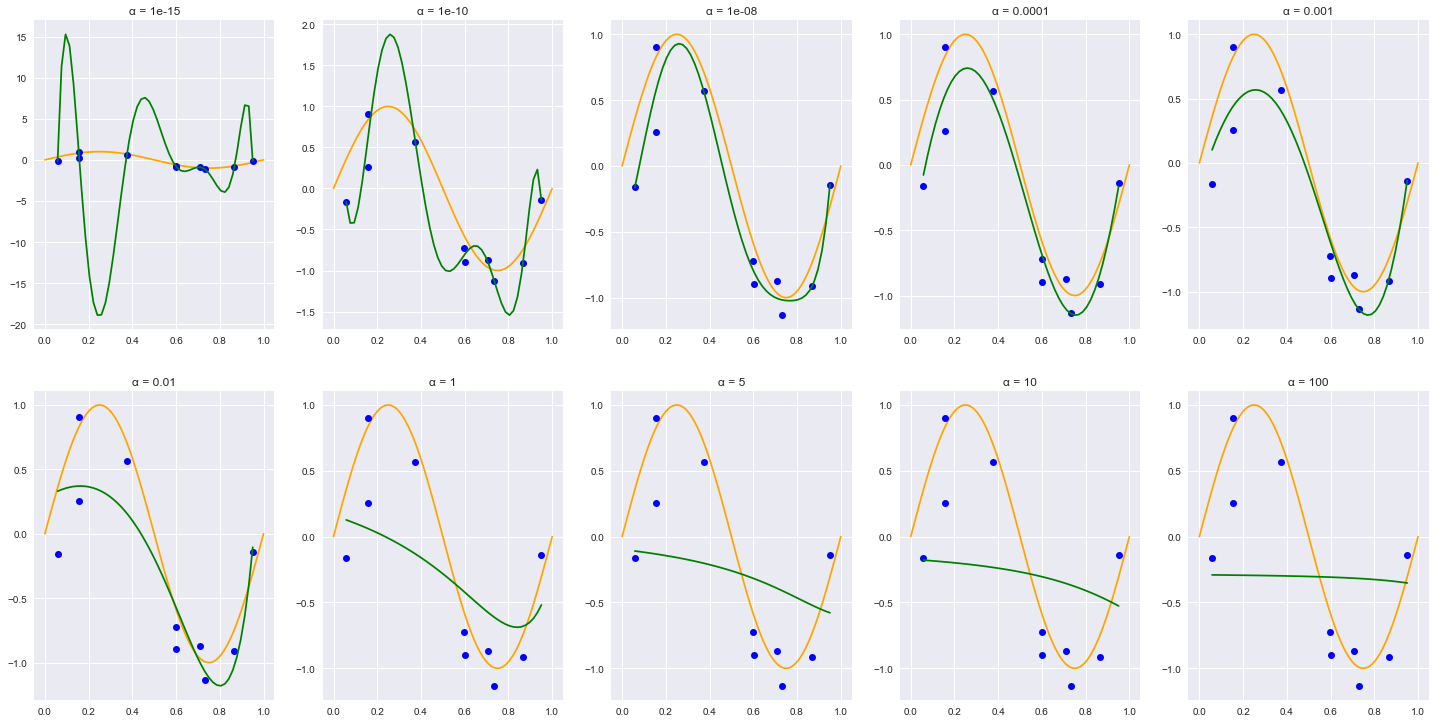

In [27]:
coefs = []
rss = []
fig, axs = plt.subplots(2,5, figsize = (25,12.5))
alphas = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 100]
for i in range(0,2):
    for j in range (0,5):
        RidgeModel = Ridge(normalize=True, alpha = alphas[5*i+j])
        RidgeModel.fit(data, y_noise)  # training the model using the 10 data points 
        TestData_pred_curve = RidgeModel.predict(Test_Data) ## Model applied to the test data
        y_pred_points = RidgeModel.predict(data)  ## Model applied on the traing data
        rss.append(np.sum(np.square(y_noise - y_pred_points))) ## training RSS
        coefs.append(RidgeModel.coef_)
        axs[i,j].plot(x2,y2, label = 'y = sin (2πx)', color='orange') ## the sin function
        axs[i,j].plot(x, y_noise,"o" , color='b') # plot the 10 training data points
        axs[i,j].plot(Test_Data.x, TestData_pred_curve, color = 'g') # plot the predicted ouput of the 50 test data points
        axs[i,j].title.set_text("α = " + str(alphas[5*i+j]))

<p>As seen above, as the value of α increases, there is a transition from overfitting to underfitting. This shows the power of regression to reverse the effects of overfitting but also highlights the importance of appropriately affecting the α value as too high of a value results in severe underfitting. We can see the effect through the size of coefficients for the various values of α below. </p>

In [10]:
coef_mat = pd.DataFrame(coefs)
pd.options.display.float_format = '{:,.2g}'.format
coef_mat.index = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 100]
coef_mat.index.name = 'alpha'
coef_mat.columns = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']
coef_mat

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
alpha,,,,,,,,,,
1e-15,3.7e+03,-3.3e+04,1.1e+05,-7.3e+04,-3.7e+05,7.8e+05,-8.3e+04,-1.1e+06,1.2e+06,-3.7e+05
1e-10,-1.1e+02,1.1e+03,-3.4e+03,3.4e+03,2.2e+03,-3.2e+03,-3.8e+03,1.7e+03,5.9e+03,-3.8e+03
1e-08,4.4,46,-2.1e+02,1.6e+02,1.6e+02,-93,-1.9e+02,-11,1.9e+02,-67
0.0001,11,-20,-4.7,7.9,9.7,4.9,-1.2,-4.9,-3.9,2.8
0.001,5.7,-9.2,-5.4,0.35,3.8,4.7,3.8,1.7,-0.92,-3.7
0.01,1.1,-2.8,-2.4,-1,0.2,0.98,1.3,1.4,1.2,0.8
1,-0.55,-0.46,-0.34,-0.2,-0.063,0.053,0.16,0.25,0.33,0.4
5,-0.2,-0.16,-0.13,-0.09,-0.054,-0.022,0.0047,0.029,0.05,0.069
10,-0.11,-0.098,-0.079,-0.06,-0.042,-0.026,-0.012,-0.00018,0.01,0.02


<p>The following is a visualization of the ridge where we can see the size of the coefficients drastically dropping and approaching zero as α approaches $ \infty $. </p>

Text(0.5, 1.0, 'The effect of regulariztion term α on the mean absolute magnitude of coefficients')

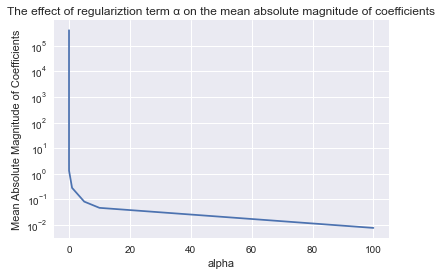

In [11]:
abs(coef_mat).mean(axis=1).plot(logy=True)
plt.ylabel("Mean Absolute Magnitude of Coefficients")
plt.title("The effect of regulariztion term α on the mean absolute magnitude of coefficients")